In [183]:
# =======
# imports
# =======
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
import shapely

We want to see whether there is a correlation between grid access and distance from the grid. For each country in Africa we will plot:
- the % of population having electricity access in 2010 (x axis); 
- the % of population located x km from the grid (y axis). 

The former we have it from statistics. The latter we calculate it for different values of x. 

In QGIS (file distance_from_grid) we take existing grid buffer layers, created during the on-grid analysis, corresponding to x = [1, 5, 20, 50]: b_1k, b_5k, b20k and b_50k. We then intersect them with the country borders, keeping field ID for both layers, and fields CODE, COUNTRY and popsum for the borders layer. We save the result in xkm_clip files. 

Next we open the attribute table and eliminate rows where ID != ID_2. This clips the buffers to lie within country borders. We then run zonal stats to calculate the number of people in the buffers, and import the files here. 

In [184]:
gisdir = "C:\\Users\\dallalongaf\\OneDrive - TNO\\work\\2016 02 - TransRisk\\4 - energy access\\AFR_alt\\gis_layers\\on-grid_access\\buffers\\"

# read in all buffs as gdfs and put them in a list
x = [1,5,20,50]
buffs = []
for i in x: 
    fname = str(i) + "km_clip.shp"
    gdf = gpd.read_file(gisdir + fname)
    
    # group by country
    gdf = gdf.groupby(['COUNTRY','CODE']).sum().reset_index().set_index('COUNTRY')
    
    # append a column with % of pop in the buffer
    gdf.loc[:,str(i) + "km%"] = 100 * gdf.Gpopsum / gdf.popsum
    
    buffs.append(gdf)
    
buffs[0].head()

,CODE,popsum,Gpopsum,1km%
COUNTRY,,,,
Algeria,ALG,29343458.0,6575516.0,22.408797
Angola,ANG,18189991.0,1512757.0,8.316425
Benin,BEN,9233573.0,2737001.0,29.641841
Botswana,BOT,1528788.0,387938.0,25.375526
Burkina Faso,BUF,15097690.0,2747089.0,18.195426


In [185]:
# put all % in a new df

dist_share = buffs[0][['CODE','popsum']]
for b in buffs:
    cname = b.columns[-1]
    dist_share.loc[:,cname] = b.loc[:,cname]

dist_share.head()


C:\Users\dallalongaf\AppData\Local\Enthought\Canopy\edm\envs\CepPy3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\dallalongaf\AppData\Local\Enthought\Canopy\edm\envs\CepPy3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,CODE,popsum,1km%,5km%,20km%,50km%
COUNTRY,,,,,,
Algeria,ALG,29343458.0,22.408797,59.536882,81.633249,92.789340
Angola,ANG,18189991.0,8.316425,23.886884,39.299508,58.314388
Benin,BEN,9233573.0,29.641841,61.211678,83.565723,94.794886
Botswana,BOT,1528788.0,25.375526,64.936145,87.050657,96.327745
Burkina Faso,BUF,15097690.0,18.195426,40.092703,67.119612,94.913666


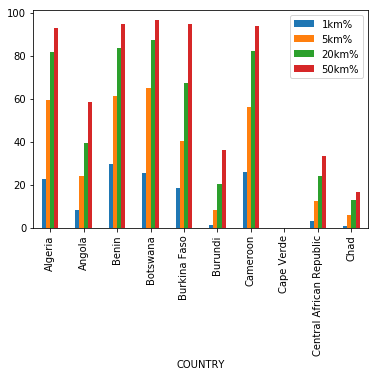

In [186]:
dist_share.iloc[:10,2:].plot(kind='bar')

In [187]:
# import el acc data: 
acc = pd.read_excel("input_data\\el_acc.xlsx",skiprows=3)[['COUNTRY','CODE','2010']]
acc.head()

,COUNTRY,CODE,2010
0,Aruba,ABW,93.356292
1,Afghanistan,AFG,42.700000
2,Angola,AGO,33.514950
3,Albania,ALB,100.000000
4,Andorra,AND,100.000000


In [188]:
# Check that all the countries we need are there:
for i in dist_share.index:
    if i not in list(acc.COUNTRY):
        print(i)

In [189]:
# put these data in our DF
dist_share.loc[:,'acc%'] = acc.set_index('COUNTRY')['2010']
dist_share.head()

,CODE,popsum,1km%,5km%,20km%,50km%,acc%
COUNTRY,,,,,,,
Algeria,ALG,29343458.0,22.408797,59.536882,81.633249,92.789340,98.884972
Angola,ANG,18189991.0,8.316425,23.886884,39.299508,58.314388,33.514950
Benin,BEN,9233573.0,29.641841,61.211678,83.565723,94.794886,34.200000
Botswana,BOT,1528788.0,25.375526,64.936145,87.050657,96.327745,47.793114
Burkina Faso,BUF,15097690.0,18.195426,40.092703,67.119612,94.913666,13.100000


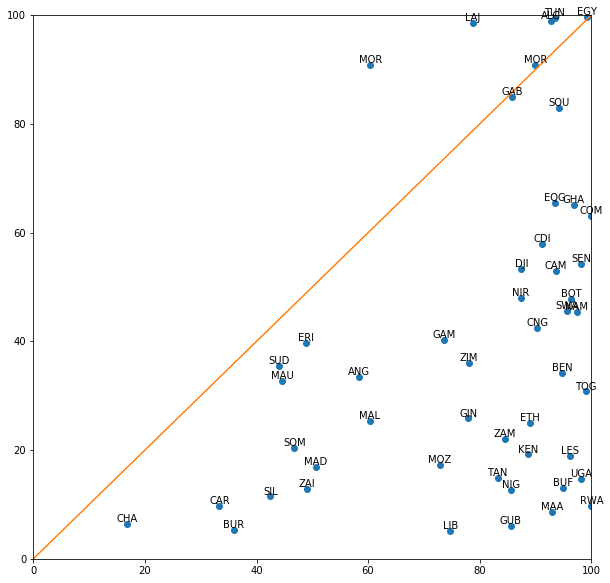

In [193]:
# plot

#plt.plot(list(dist_share['acc%']),list(dist_share['1km%']),'o')
#plt.plot(list(dist_share['acc%']),list(dist_share['5km%']),'o')
#plt.plot(list(dist_share['acc%']),list(dist_share['20km%']),'o')
pty = list(dist_share['acc%'])
ptx = list(dist_share['50km%'])
plt.plot(ptx,pty,'o')
for xy in zip(ptx,pty):
    f1 = dist_share['acc%'] == xy[1]
    c = dist_share[f1].loc[:,'CODE'].values[0]
    plt.annotate(c, xy,ha='center',va='bottom')
    #print(c)
plt.plot((100,0),(100,0),'-')
plt.xlim(0,100)
plt.ylim(0,100)
plt.gcf().set_size_inches(10,10)


In [85]:
dist_share['CODE']

COUNTRY
Algeria                         ALG
Angola                          ANG
Benin                           BEN
Botswana                        BOT
Burkina Faso                    BUF
Burundi                         BUR
Cameroon                        CAM
Cape Verde                      CAP
Central African Republic        CAR
Chad                            CHA
Comoros                         COM
Congo                           CNG
Democratic Republic of Congo    ZAI
Djibouti                        DJI
Egypt                           EGY
Equatorial Guinea               EQG
Eritrea                         ERI
Ethiopia                        ETH
Gabon                           GAB
Gambia                          GAM
Ghana                           GHA
Guinea                          GIN
Guinea Bissau                   GUB
Ivory Coast                     CDI
Kenya                           KEN
Lesotho                         LES
Liberia                         LIB
Libya               

In [162]:
shares = dist_share.loc[:,'1km%':'50km%']
shares.loc[:,'1'] = dist_share.loc[:,'1km%']
shares.loc[:,'5'] = shares.loc[:,'5km%'] - dist_share.loc[:,'1km%']
shares.loc[:,'20'] = shares.loc[:,'20km%'] - dist_share.loc[:,'5km%']
shares.loc[:,'50'] = shares.loc[:,'50km%'] - dist_share.loc[:,'20km%']
shares.loc[:,'51'] = 100 - dist_share.loc[:,'50km%']
shares.head()

,1km%,5km%,20km%,50km%,1,5,20,50,51
COUNTRY,,,,,,,,,
Algeria,22.408797,59.536882,81.633249,92.789340,22.408797,37.128085,22.096366,11.156091,7.210660
Angola,8.316425,23.886884,39.299508,58.314388,8.316425,15.570459,15.412624,19.014880,41.685612
Benin,29.641841,61.211678,83.565723,94.794886,29.641841,31.569838,22.354044,11.229163,5.205114
Botswana,25.375526,64.936145,87.050657,96.327745,25.375526,39.560619,22.114512,9.277087,3.672255
Burkina Faso,18.195426,40.092703,67.119612,94.913666,18.195426,21.897277,27.026909,27.794053,5.086334


In [180]:
dist_share.loc[:,'avg'] = shares.loc[:,'1':'51'].idxmax(axis=1)

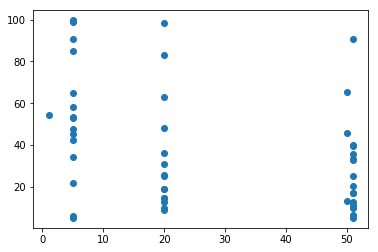

In [181]:
ptx = dist_share['avg'].astype(float)
pty = dist_share['acc%'].astype(float)
plt.plot(ptx,pty,'o')

In [182]:
dist_share.head()

,CODE,popsum,1km%,5km%,20km%,50km%,acc%,avg
COUNTRY,,,,,,,,
Algeria,ALG,29343458.0,22.408797,59.536882,81.633249,92.789340,98.884972,5
Angola,ANG,18189991.0,8.316425,23.886884,39.299508,58.314388,33.514950,51
Benin,BEN,9233573.0,29.641841,61.211678,83.565723,94.794886,34.200000,5
Botswana,BOT,1528788.0,25.375526,64.936145,87.050657,96.327745,47.793114,5
Burkina Faso,BUF,15097690.0,18.195426,40.092703,67.119612,94.913666,13.100000,50
